# Phân Tích Hồ Sơ Ứng Dụng Có Lợi Nhuận trên App Store và Google Play

# _Profitable App Profiles for the App Store and Google Play Markets_

_This project is to generate foundation for readers understanding the mean of dataset_

# OPEN AND EXPLORE DATA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Appstore = pd.read_csv("AppleStore.csv")
Googleplay = pd.read_csv("googleplaystore.csv")

In [9]:
Appstore.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [10]:
Appstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [11]:
Googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
Googleplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
Appstore.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [14]:
Googleplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## DATA CLEANING
* Detect inaccurare data, and correct or remove it
* Detect duplicate data, and remove the duplicates
* Only free app
* Only English language

### _Googleplay (GP)_

### Remove duplicates
Sort_values by ["App","Reviews",ascending = False] then drop to keep first ( max of review )

In [16]:
Googleplay.groupby("App").size().sort_values(ascending = False)

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
                                                    ..
Display Phone Screen On TV                           1
Displaying You VR                                    1
Ditto CP Calculator GO                               1
Dive-Store.ch                                        1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Length: 9660, dtype: int64

In [17]:
df1 = Googleplay.sort_values(["App","Reviews"],ascending = False)

In [18]:
GP = df1.drop_duplicates(subset = ["App"])

In [19]:
GP.groupby("App").size().sort_values(ascending = False)

App
"i DT" Fútbol. Todos Somos Técnicos.                 1
My Talking Tom                                       1
My Teacher - Classroom Play                          1
My Telcel                                            1
My Tele2                                             1
                                                    ..
Delivery trough - delivery trough delivery trough    1
Delivery yogi.                                       1
Delta Dental                                         1
Denis Brogniart - AH !                               1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Length: 9660, dtype: int64

### Remove NaN value


In [21]:
GP.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
GP["Rating"].dtype

dtype('float64')

In [23]:
GP.loc[:, "Rating"] = GP["Rating"].fillna(GP["Rating"].mean())

In [24]:
GP = GP.dropna()

### _Appstore (AS)_

### Remove dupplicate

In [26]:
AS = Appstore.sort_values(by = ["track_name","rating_count_tot"], ascending = False)

In [27]:
AS.drop_duplicates(subset = ["track_name"], inplace = True)

In [28]:
AS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7195 entries, 6759 to 6595
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7195 non-null   int64  
 1   track_name        7195 non-null   object 
 2   size_bytes        7195 non-null   int64  
 3   currency          7195 non-null   object 
 4   price             7195 non-null   float64
 5   rating_count_tot  7195 non-null   int64  
 6   rating_count_ver  7195 non-null   int64  
 7   user_rating       7195 non-null   float64
 8   user_rating_ver   7195 non-null   float64
 9   ver               7195 non-null   object 
 10  cont_rating       7195 non-null   object 
 11  prime_genre       7195 non-null   object 
 12  sup_devices.num   7195 non-null   int64  
 13  ipadSc_urls.num   7195 non-null   int64  
 14  lang.num          7195 non-null   int64  
 15  vpp_lic           7195 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory us

### Choose English App

In [30]:
def E_app(df, name):
    E_name = []
    for element in df[name]:
        error = 0
        for character in element:
            if ord(character) not in range (0,128):
                error += 1
        if error <= 2:
            E_name.append(element)
    DFE = df.loc[df[name].isin(E_name)]
    return DFE

### _Appstore_

In [32]:
DF_EAS = E_app(AS,"track_name")
DF_EAS

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4140,453691481,飞猪,148888576,USD,0.00,154,0,4.0,0.0,8.2.2,17+,Travel,37,0,1,1
5848,1059718989,雨时,117463040,USD,0.99,10,0,4.5,0.0,1.7,4+,Weather,37,0,0,1
4028,564818797,铁路12306,28961792,USD,0.00,177,0,2.0,0.0,2.80,4+,Travel,38,0,1,1
3338,907002334,豆瓣,109557760,USD,0.00,407,0,3.5,0.0,4.18.1,12+,Social Networking,37,5,2,1
7092,1078812538,花札Online,209218560,USD,0.00,0,0,0.0,0.0,1.1.20,12+,Games,40,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,974022309,( OFFTIME ) light – Track how much you use you...,28471296,USD,2.99,22,14,2.0,2.0,2.1.0,4+,Health & Fitness,37,0,5,1
3039,1105390093,"""klocki""",97887232,USD,0.99,587,587,4.5,4.5,1.01,4+,Games,37,2,1,1
2636,956794130,"""HOOK""",76611584,USD,0.99,959,150,5.0,5.0,1.04,4+,Games,40,5,1,1
3592,486692623,"""Burn your fat with me!!""",149757952,USD,1.99,302,14,4.5,4.0,5.2.4,17+,Health & Fitness,38,0,3,1


### _Googleplay_

In [34]:
DF_EGP = E_app(GP,"App")
DF_EGP

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.700000,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
313,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.100000,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,4.174893,1330,22M,"50,000+",Free,0,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,/u/app,COMMUNICATION,4.700000,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
4541,.R,TOOLS,4.500000,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
324,- Free Comics - Comic Apps,COMICS,3.500000,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up


### Free App

### _Googleplay_

In [36]:
DF_EGP = DF_EGP.loc[DF_EGP["Price"] == '0']
DF_EGP

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.700000,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
313,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.100000,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,4.174893,1330,22M,"50,000+",Free,0,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up
5569,【Miku AR Camera】Mikuture,FAMILY,4.400000,36268,41M,"1,000,000+",Free,0,Teen,Entertainment,"April 25, 2017",3.0.15,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,/u/app,COMMUNICATION,4.700000,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
4541,.R,TOOLS,4.500000,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
324,- Free Comics - Comic Apps,COMICS,3.500000,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up


### _Appstore_

In [38]:
DF_EAS = DF_EAS.loc[DF_EAS["price"] == 0]
DF_EAS

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4140,453691481,飞猪,148888576,USD,0.0,154,0,4.0,0.0,8.2.2,17+,Travel,37,0,1,1
4028,564818797,铁路12306,28961792,USD,0.0,177,0,2.0,0.0,2.80,4+,Travel,38,0,1,1
3338,907002334,豆瓣,109557760,USD,0.0,407,0,3.5,0.0,4.18.1,12+,Social Networking,37,5,2,1
7092,1078812538,花札Online,209218560,USD,0.0,0,0,0.0,0.0,1.1.20,12+,Games,40,5,1,1
6663,1095603248,秒速,13033472,USD,0.0,0,0,0.0,0.0,1.0.1,4+,Games,38,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,1128070374,1-Bit Rogue: A dungeon crawler RPG!,64439296,USD,0.0,378,106,4.5,4.5,1.3,12+,Games,38,3,1,1
1792,953831664,1+2=3,21727232,USD,0.0,2816,37,4.0,3.5,9.13.0,4+,Games,37,4,1,1
2264,662749248,. Calculator .,59232256,USD,0.0,1525,352,4.5,5.0,3.15,4+,Utilities,37,5,31,1
3211,1140586546,*Solitaire*,124961792,USD,0.0,460,10,4.5,4.5,2.3.1,4+,Games,37,5,1,1


### Common genre in each market

In [40]:
dfas = DF_EAS.groupby("prime_genre")["user_rating"].agg(["size", "mean"]).reset_index()

In [41]:
dfas["percentile of size"] = 100*dfas["size"]/(sum(dfas["size"]))

In [42]:
dfas.sort_values(["size","mean"], ascending = False)

,prime_genre,size,mean,percentile of size
7,Games,1864,4.052039,58.231803
4,Entertainment,251,3.547809,7.841300
14,Photo & Video,160,3.903125,4.998438
3,Education,118,3.635593,3.686348
18,Social Networking,106,3.594340,3.311465
17,Shopping,83,3.975904,2.592940
21,Utilities,79,3.569620,2.467979
19,Sports,69,3.065217,2.155576
11,Music,66,3.946970,2.061856
8,Health & Fitness,65,3.769231,2.030615


In [43]:
dfgp = DF_EGP.groupby("Genres")["Rating"].agg(["size","mean"]).reset_index()
dfgp["percentile of size"] = 100*dfgp["size"]/(sum(dfgp["size"]))
dfgp.sort_values(["size","mean"], ascending = False)

,Genres,size,mean,percentile of size
104,Tools,745,4.046128,8.429509
49,Entertainment,537,4.088904,6.076035
36,Education,473,4.278157,5.351890
19,Business,407,4.130795,4.605114
79,Productivity,345,4.180633,3.903598
...,...,...,...,...
66,Lifestyle;Pretend Play,1,4.000000,0.011315
11,Art & Design;Pretend Play,1,3.900000,0.011315
60,Health & Fitness;Action & Adventure,1,3.900000,0.011315
74,Parenting;Brain Games,1,3.800000,0.011315


In [44]:
DF_EGP.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.700000,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
313,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.100000,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,4.174893,1330,22M,"50,000+",Free,0,Everyone,Comics,"July 3, 2018",6.1.1,4.2 and up
5569,【Miku AR Camera】Mikuture,FAMILY,4.400000,36268,41M,"1,000,000+",Free,0,Teen,Entertainment,"April 25, 2017",3.0.15,4.2 and up


In [49]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [51]:
DF_EAS.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4140,453691481,飞猪,148888576,USD,0.00,154,0,4.00,0.00,8.2.2,17+,Travel,37,0,1,1
4028,564818797,铁路12306,28961792,USD,0.00,177,0,2.00,0.00,2.80,4+,Travel,38,0,1,1
3338,907002334,豆瓣,109557760,USD,0.00,407,0,3.50,0.00,4.18.1,12+,Social Networking,37,5,2,1
7092,1078812538,花札Online,209218560,USD,0.00,0,0,0.00,0.00,1.1.20,12+,Games,40,5,1,1
6663,1095603248,秒速,13033472,USD,0.00,0,0,0.00,0.00,1.0.1,4+,Games,38,5,2,1


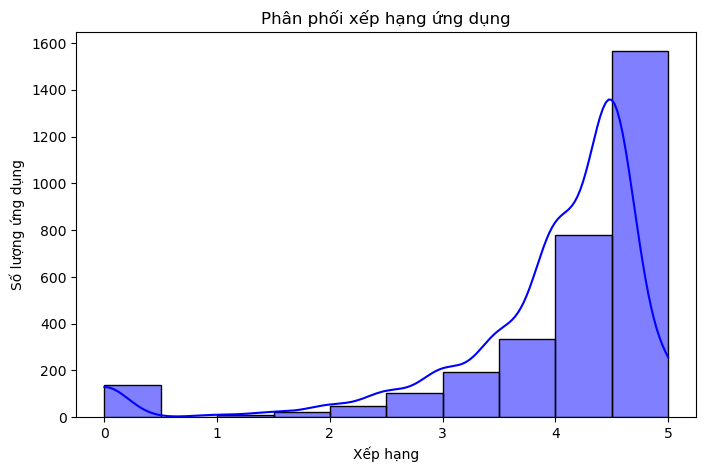

In [53]:

# Biểu đồ histogram phân phối xếp hạng ứng dụng
plt.figure(figsize=(8, 5))
sns.histplot(DF_EAS["user_rating"], bins=10, kde=True, color="blue")
plt.title("Phân phối xếp hạng ứng dụng")
plt.xlabel("Xếp hạng")
plt.ylabel("Số lượng ứng dụng")
plt.show()

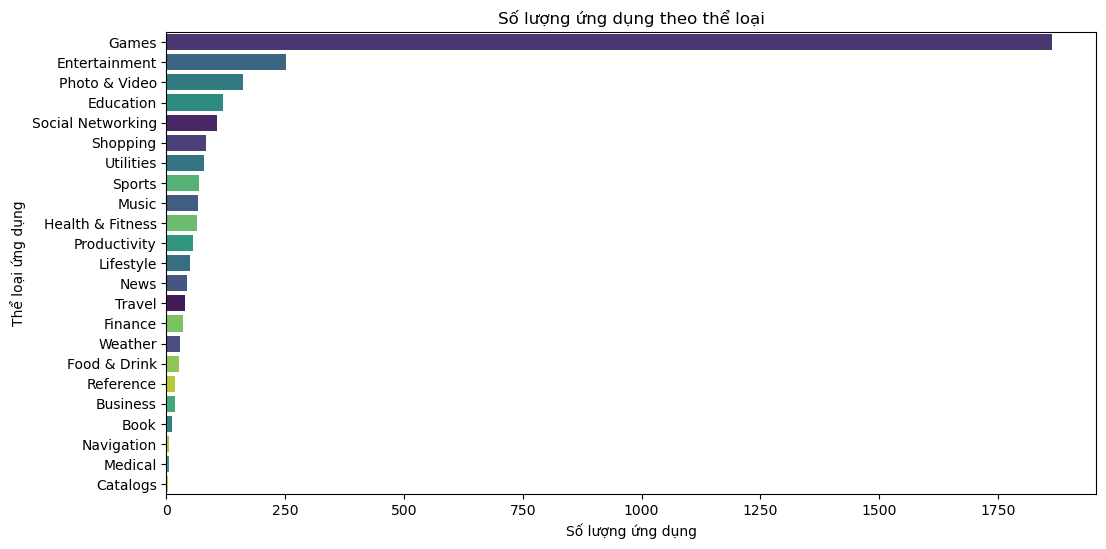

In [63]:
# Biểu đồ cột số lượng ứng dụng theo thể loại
plt.figure(figsize=(12, 6))
sns.countplot(y=DF_EAS["prime_genre"],hue=DF_EAS["prime_genre"], order=DF_EAS["prime_genre"].value_counts().index, palette="viridis")
plt.title("Số lượng ứng dụng theo thể loại")
plt.xlabel("Số lượng ứng dụng")
plt.ylabel("Thể loại ứng dụng")
plt.show()

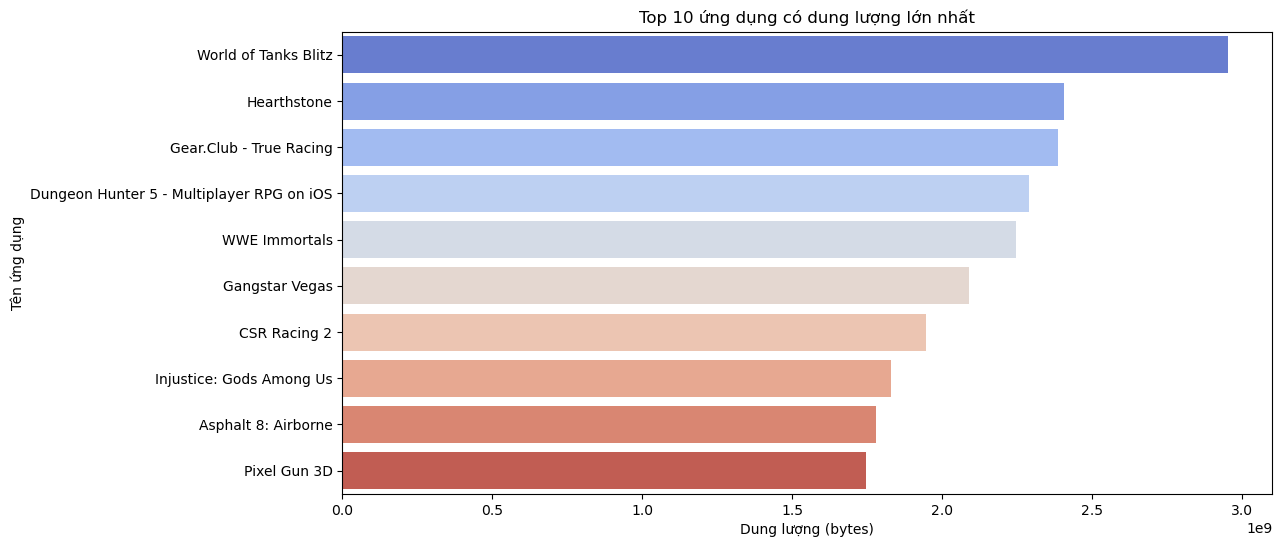

In [72]:
# Top 10 ứng dụng có dung lượng lớn nhất
top_apps = DF_EAS.nlargest(10, "size_bytes")
plt.figure(figsize=(12, 6))
sns.barplot(y=top_apps["track_name"],hue=top_apps["track_name"], x=top_apps["size_bytes"], palette="coolwarm", legend=False)
plt.title("Top 10 ứng dụng có dung lượng lớn nhất")
plt.xlabel("Dung lượng (bytes)")
plt.ylabel("Tên ứng dụng")
plt.show()

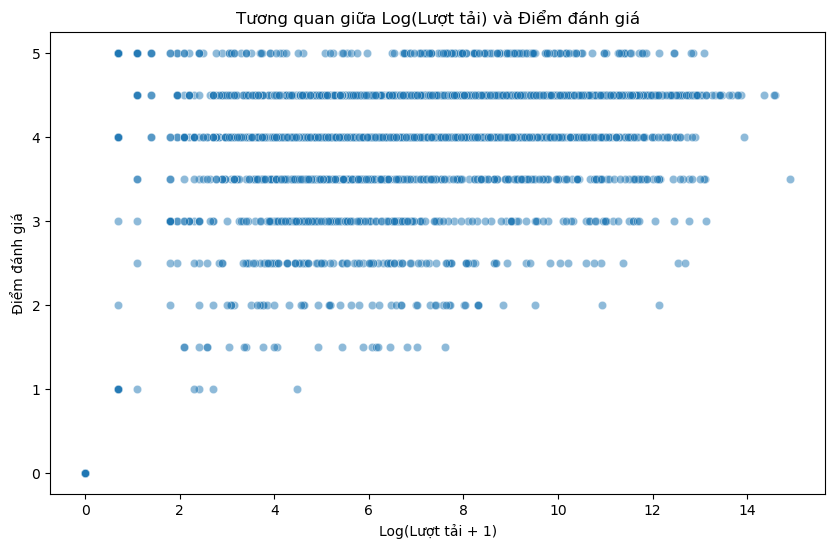

In [76]:
# Tương quan giữa lượt tải và điểm đánh giá
DF_EAS.loc[:, "log_rating_count"] = np.log1p(DF_EAS["rating_count_tot"])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DF_EAS, x="log_rating_count", y="user_rating", alpha=0.5)

plt.xlabel("Log(Lượt tải + 1)")
plt.ylabel("Điểm đánh giá")
plt.title("Tương quan giữa Log(Lượt tải) và Điểm đánh giá")

plt.show()